### Problem Statement from the Futurama Example:
With an increasing number of platforms for video games, knowing which one is best for your game will reduce the risk of it not performing well. It will minimize the cost and will, hopefully, increase your chances of creating a best seller.

### Hypothesis
Video game details such as publisher, game genre, and console can accurately predict how well the game will sell.

### Datasets
On Kaggle, I found video game sales data from VGChartz. This data shows regional and global sales information for over 16,000 games across multiple consoles, publishers, and game genres starting from 1980. More information about this dataset can be found here:

https://www.kaggle.com/gregorut/videogamesales

### Domain Knowledge
As the younger sister of two older brothers, I have grown up playing and have always had an interest in video games. Over the years, I've learned a lot about which consoles are best for what experience, which publisher offers a more complex plot, etc. Based of this, I have some ideas for different attributes to test to see if there's any correlation in sales.

Also, as the dataset is available on Kaggle, I am able to see what other users have done previously with this data. Unsurprisingly, most have been just visualization of this data. From this, I've gathered some ideas of what I want to do with this data such as group by console publishers instead of just consoles and drop data for 2016 and beyond. 

### Project Concerns

Honestly, my main concern is being able to have enough time to test all the things I want. The more we learn, the more ideas I have. My dream is for the final project to be made into an interactive site where users are able to not only toggle between consoles, but also able to do things such as search for keywords. 

As for the data itself, it would be great if I also had data that shows console sales so I can compare video game sales to the consoles themselves. And now that games for smartphones have become widely popular, that would be another great dataset to have. 

Some of the assumptions I'm making for these numbers is that it accounts for total sales throughout the years rather than a specific period of time, it only accounts for official sales in stores (no pirated or copied games), the conversion rates for the global units were the same, and it does not account for inflation.

### Outcomes

I expect certain genres of games to do better on certain consoles than others and certain brands (Mario, Grand Theft Auto, etc.) to sell better as well. I believe the combination of things like this will be the way to determine prospective sales. 

Based off my limited knowledge of the video gaming industry, I don't imagine that this project will be a complete bust. I hope for a low p-value and a high r-squared.

#########

## Final Project

Below is some of the work I've done so far on this project. 

### Steps

* Identify the Problem
* Acquire the Data
* Parse the Data
* Mine the Data
* Refine the Data
* Create a Data Model
* Present the Results

In [6]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_raw = pd.read_csv("vgsales.csv")

In [7]:
df_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
df_raw.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
# Check the data for the years 2016, 2017, 2020, and nan
# Drop the rows that are useless

df_raw['Year'].unique()

array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2003.,  1986.,  2000.,    nan,  1995.,
        2016.,  1991.,  1981.,  1987.,  1980.,  1983.,  2020.,  2017.])

In [10]:
# Copy the data to delete the rows where there is no year or where the year is 2016 and beyond.

data = df_raw.copy()

In [11]:
# Show data where the year is 2016 and beyond

data[data.Year > 2015] 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
351,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
770,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
845,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
1026,1028,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.73
1156,1158,No Man's Sky,PS4,2016.0,Action,Hello Games,0.58,0.74,0.02,0.26,1.60
1189,1191,Dark Souls III,PS4,2016.0,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56
1224,1226,FIFA 17,XOne,2016.0,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53
1389,1391,Doom (2016),PS4,2016.0,Shooter,Bethesda Softworks,0.49,0.66,0.02,0.22,1.39


In [12]:
# Drop the data for 2016 and beyond
# This also dropped all nan.

data = data[data.Year < 2016]

In [13]:
# Confirm that I've dropped the data

data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15979.000000,15979.000000,15979.00000,15979.000000,15979.000000,15979.000000,15979.000000
mean,8224.104262,2006.197071,0.26976,0.149093,0.079514,0.048892,0.547537
std,4775.817280,5.714810,0.82956,0.512557,0.314536,0.191612,1.580275
min,1.000000,1980.000000,0.00000,0.000000,0.000000,0.000000,0.010000
25%,4080.500000,2003.000000,0.00000,0.000000,0.000000,0.000000,0.060000
50%,8207.000000,2007.000000,0.08000,0.020000,0.000000,0.010000,0.180000
75%,12332.500000,2010.000000,0.24000,0.110000,0.040000,0.040000,0.490000
max,16600.000000,2015.000000,41.49000,29.020000,10.220000,10.570000,82.740000


In [14]:
# From the above table, I realized that there are no more NaN values in Year, so I used the formulas below to just confirm they are gone.

print data['Year'].isnull().sum()
data['Year'].unique()

0


array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2003.,  1986.,  2000.,  1995.,  1991.,
        1981.,  1987.,  1980.,  1983.])

In [15]:
# Check the data dictionary for all these platforms

data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO',
       'GG', 'PCFX'], dtype=object)

In [16]:
# Plot the data for just Wii

wii = data[data.Platform == 'Wii']
xbox = data[data.Platform == 'XB']
ps = data[data.Platform == 'PS']

In [17]:
wii.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [18]:
ps.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,53,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
66,67,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,70,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
87,88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58


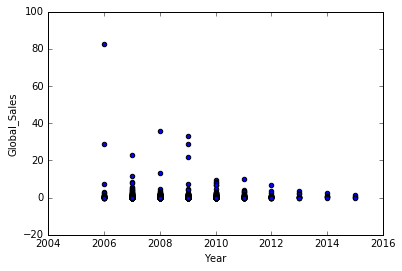

In [19]:
wii.plot(kind='scatter', x='Year', y='Global_Sales')

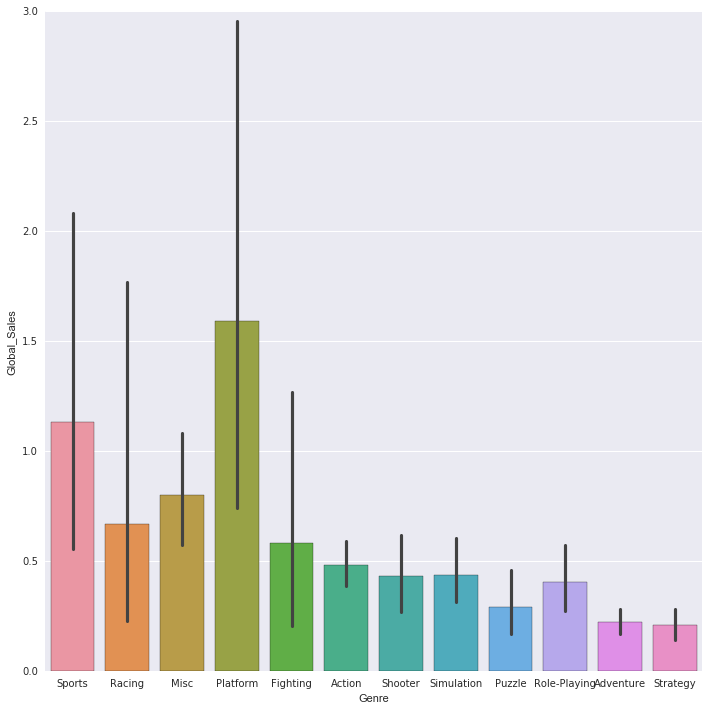

In [20]:
import seaborn as sb

sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = wii,
             size=10)

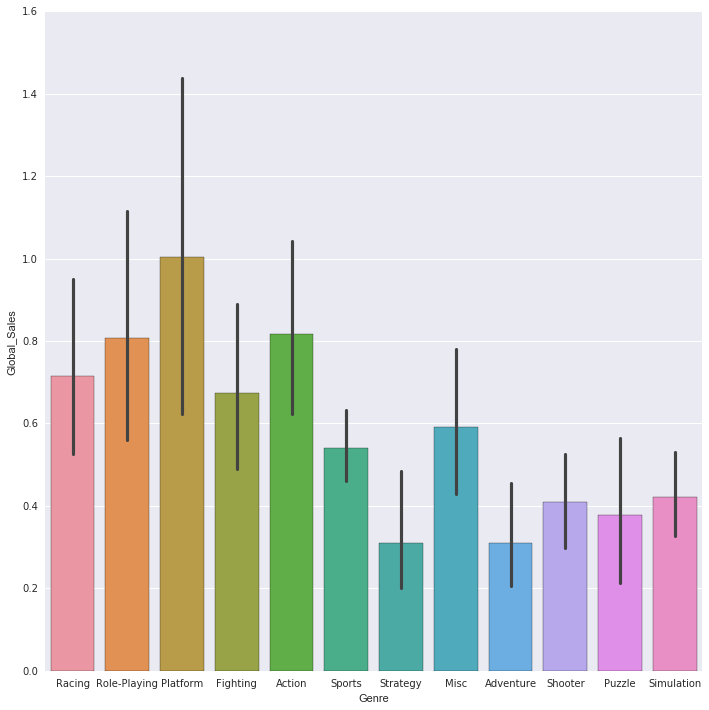

In [87]:
import seaborn as sb

sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = ps,
             size=10)

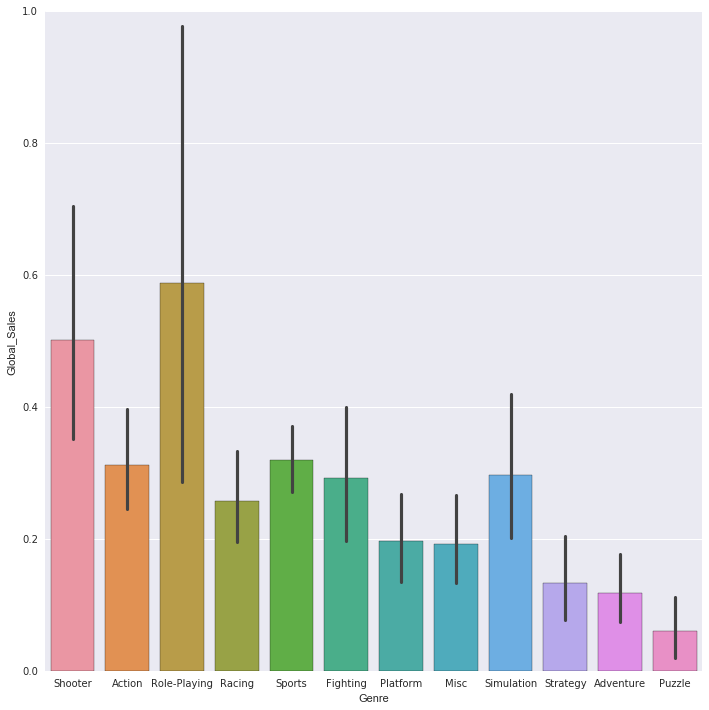

In [21]:
import seaborn as sb

sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = xbox,
             size=10)

In [22]:
xbox[xbox.Genre == 'Action'].mean()

Rank            8719.236842
Year            2003.822368
NA_Sales           0.218355
EU_Sales           0.080329
JP_Sales           0.002171
Other_Sales        0.011250
Global_Sales       0.312237
dtype: float64

In [23]:
# Check to see if there are any games that span across multiple platforms, GTA might be a good one to look up? Ask people.


In [24]:
# See if there are any correlations.
# Looks like there are correlations in sales data-- not surprising
# Interesting which area's sales have correlation - like European Sales don't have such a strong correlation with Japan Sales

data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.162287,-0.400187,-0.378374,-0.269076,-0.331476,-0.426326
Year,0.162287,1.000000,-0.085347,0.011394,-0.170121,0.047488,-0.069223
NA_Sales,-0.400187,-0.085347,1.000000,0.770262,0.451618,0.634225,0.941499
EU_Sales,-0.378374,0.011394,0.770262,1.000000,0.437859,0.725572,0.903753
JP_Sales,-0.269076,-0.170121,0.451618,0.437859,1.000000,0.290955,0.613358
Other_Sales,-0.331476,0.047488,0.634225,0.725572,0.290955,1.000000,0.747362
Global_Sales,-0.426326,-0.069223,0.941499,0.903753,0.613358,0.747362,1.000000
